In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define image dimensions and number of classes
image_height, image_width = 224, 224
num_classes = 1
num_Subclasses = 7  # Three subclasses: Blackgram, Wheat, Soyabean

# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Define data directories
train_dir = "/content/drive/MyDrive/Colab Notebooks/ml_dataset/dataset/Wholesale_test/Grains"
val_dir = "/content/drive/MyDrive/Colab Notebooks/ml_dataset/dataset/Wholesale_validation/Grains"
test_dir = "/content/drive/MyDrive/Colab Notebooks/ml_dataset/dataset/Wholesale_test/Grains"
batch_size = 25

# Flow images from directory
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='categorical')

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='categorical')

# Get class names
class_names = list(train_generator.class_indices.keys())
print("Class Names:", class_names)


Found 89 images belonging to 7 classes.
Found 124 images belonging to 7 classes.
Found 89 images belonging to 7 classes.
Class Names: ['BlackGram', 'Chickpea', 'Moong', 'Mustard', 'Rice', 'Soyabean', 'Wheat']


In [22]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define image dimensions and number of classes
image_height, image_width = 224, 224
num_classes = 7  # Number of subclasses

# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Define data directories
train_dir = "/content/drive/MyDrive/Colab Notebooks/ml_dataset/dataset/Wholesale_test/Grains"
val_dir = "/content/drive/MyDrive/Colab Notebooks/ml_dataset/dataset/Wholesale_validation/Grains"
test_dir = "/content/drive/MyDrive/Colab Notebooks/ml_dataset/dataset/Wholesale_test/Grains"

# Batch size and number of epochs
batch_size = 32
num_epochs = 10


# Flow images from directory
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='categorical')

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='categorical')

# Define model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(image_height, image_width, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')  # Changed units to num_classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_generator, epochs=num_epochs, validation_data=val_generator)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_generator)
print('Test Accuracy:', test_accuracy)


Found 89 images belonging to 7 classes.
Found 124 images belonging to 7 classes.
Found 89 images belonging to 7 classes.
Epoch 1/10
3/3 [==============================] - 60s 6s/step - loss: 3.3453 - accuracy: 0.1011 - val_loss: 2.3655 - val_accuracy: 0.1290
Epoch 2/10
3/3 [==============================] - 15s 6s/step - loss: 2.1253 - accuracy: 0.1573 - val_loss: 1.9003 - val_accuracy: 0.2742
Epoch 3/10
3/3 [==============================] - 15s 6s/step - loss: 1.8860 - accuracy: 0.2697 - val_loss: 1.7553 - val_accuracy: 0.1935
Epoch 4/10
3/3 [==============================] - 21s 7s/step - loss: 1.7068 - accuracy: 0.2584 - val_loss: 1.4385 - val_accuracy: 0.6371
Epoch 5/10
3/3 [==============================] - 15s 6s/step - loss: 1.5699 - accuracy: 0.3483 - val_loss: 1.5099 - val_accuracy: 0.4194
Epoch 6/10
3/3 [==============================] - 16s 6s/step - loss: 1.3963 - accuracy: 0.4944 - val_loss: 1.1806 - val_accuracy: 0.6210
Epoch 7/10
3/3 [==============================] - 1

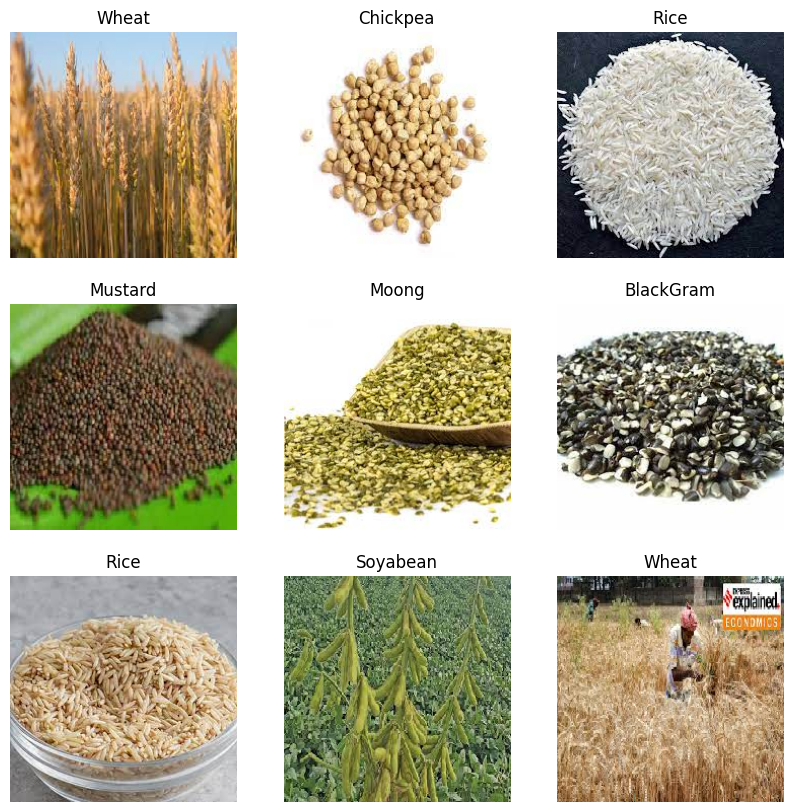

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
images, labels = next(train_generator)  # Assuming train_generator is your data generator
class_names = train_generator.class_indices.keys()  # Assuming you have class names

for i in range(9):  # Displaying 9 images
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    label_index = labels[i].argmax()
    plt.title(list(class_names)[label_index])  # Convert class indices to class names
    plt.axis('off')

plt.show()


1/1 [==============================] - 0s 62ms/step


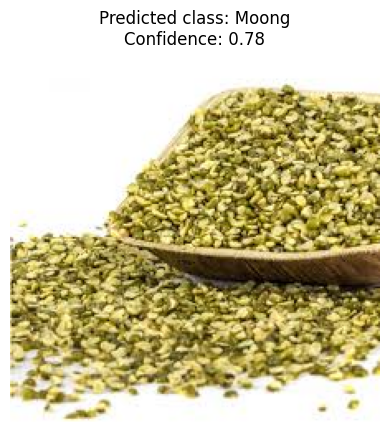

In [29]:
import tensorflow as tf

# Load the image
image_path = '/content/sample_data/Moong_9.jpg'
image = tf.keras.utils.load_img(image_path, target_size=(image_height, image_width))

# Convert the image to an array
image_array = tf.keras.utils.img_to_array(image)

# Expand dimensions to create a batch
image_batch = tf.expand_dims(image_array, axis=0)

# Preprocess the image (normalize pixel values)
image_preprocessed = image_batch / 255.0

# Make predictions
predictions = model.predict(image_preprocessed)

# Convert class_names to a list
class_names = list(class_names)

# Display the image
plt.imshow(image)
plt.axis('off')

# Display the predicted class and its probability
predicted_class_index = tf.argmax(predictions[0]).numpy()
predicted_class = class_names[predicted_class_index]
confidence = predictions[0][predicted_class_index]
plt.title(f"Predicted class: {predicted_class}\nConfidence: {confidence:.2f}")
plt.show()


In [31]:
model.save('Image_classify.keras')


In [ ]:
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt

# Define the target size
img_height = 180
img_width = 180

# Define the path to the image
image_path = '/content/sample_data/wheat.jpg'
image_name = os.path.basename(image_path)

# Load the image and resize it
image = tf.keras.utils.load_img(image_path, target_size=(img_height, img_width))

# Convert the image to an array
img_arr = tf.keras.utils.img_to_array(image)

img_bat = tf.expand_dims(img_arr, 0)

# Load the saved model
model = tf.keras.models.load_model('Image_classify.keras')

# Define your categories
dataset = {
    'grains': ['BlackGram', 'Chickpea', 'Moong', 'Mustard', 'Rice', 'Soyabean', 'Wheat']  # Define your subclasses here
}

predict = model.predict(img_bat)

score = tf.nn.softmax(predict)

# Print the prediction result
print('Veg/Crops in image is {} with accuracy of {:0.2f}'.format(dataset[np.argmax(score)], np.max(score) * 100))

# Display the image
plt.imshow(image)
plt.title(f'{image_name} - Predicted category: {dataset[np.argmax(score)]}')
plt.axis('off')
plt.show()


1/1 [==============================] - 0s 105ms/step
Grain in image is Soyabean with accuracy of 31.18%


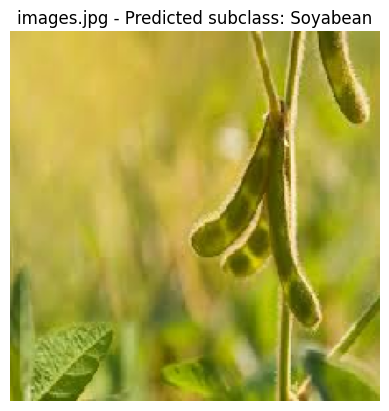

In [37]:

import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt

# Define the target size
img_height = 224
img_width = 224  # Adjusted to match the input shape expected by the model

# Define the path to the image
image_path = '/content/sample_data/images.jpg'
image_name = os.path.basename(image_path)

# Load the image and resize it
image = tf.keras.utils.load_img(image_path, target_size=(img_height, img_width))

# Convert the image to an array
img_arr = tf.keras.utils.img_to_array(image)

img_bat = tf.expand_dims(img_arr, 0)

# Load the saved model
model = tf.keras.models.load_model('Image_classify.keras')

# Define your categories
dataset = {
    'grains': ['BlackGram', 'Chickpea', 'Moong', 'Mustard', 'Rice', 'Soyabean', 'Wheat']  # Define your subclasses here
}

predict = model.predict(img_bat)

score = tf.nn.softmax(predict)

# Get the predicted class index
predicted_class_index = np.argmax(score)

# Get the predicted subclass from the 'grains' category
predicted_subclass = dataset['grains'][predicted_class_index]

# Print the prediction result
print('Grain in image is {} with accuracy of {:0.2f}%'.format(predicted_subclass, np.max(score) * 100))

# Display the image
plt.imshow(image)
plt.title(f'{image_name} - Predicted subclass: {predicted_subclass}')
plt.axis('off')
plt.show()


In [42]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define image dimensions
image_height, image_width = 224, 224

# Define data directories
train_dir = "/content/drive/MyDrive/Colab Notebooks/ml_dataset/dataset/Wholesale_train"
val_dir = "/content/drive/MyDrive/Colab Notebooks/ml_dataset/dataset/Wholesale_validation"
test_dir = "/content/drive/MyDrive/Colab Notebooks/ml_dataset/dataset/Wholesale_test"

# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow images from directory
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='categorical')

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='categorical')


# Get class names (immediate subdirectories)
class_names = os.listdir(train_dir)

# Initialize dictionary to store class-subclass associations
class_subclass_dict = {}

# Loop through class names
for class_name in class_names:
    subclass_dir = os.path.join(train_dir, class_name)
    subclass_names = os.listdir(subclass_dir)
    class_subclass_dict[class_name] = subclass_names

# Print class-subclass associations
for class_name, subclass_names in class_subclass_dict.items():
    print(f"Class: {class_name}")
    print(f"Subclasses: {subclass_names}")

Found 162 images belonging to 2 classes.
Found 154 images belonging to 2 classes.
Found 119 images belonging to 2 classes.
Class Names: ['Grains', 'Vegetables']
Class Names: ['Grains', 'Vegetables']
Subclass Names: [['BlackGram', 'Chickpea', 'Moong', 'Mustard', 'Rice', 'Soyabean', 'Wheat'], ['Wheat', 'Soyabean']]
Class: Grains
Subclasses: ['BlackGram', 'Chickpea', 'Moong', 'Mustard', 'Rice', 'Soyabean', 'Wheat']
Class: Vegetables
Subclasses: ['Wheat', 'Soyabean']
